# List 0 of Machine Learning course

Statistical analysis of data sets: **IRIS**, **WINE**, **GLASS**

## Introduction

In this notebook, we will perform a statistical analysis of three well-known datasets: **IRIS**, **WINE**, and **GLASS**. We will explore the datasets by loading them, performing data analysis, and visualizing the relationships between different features. Additionally, we will apply Principal Component Analysis (PCA) to reduce the dimensionality of the datasets and visualize the results in 2D and 3D plots. This analysis will help us understand the underlying patterns and structures in the data, which is a crucial step in the machine learning process.

**Datasets:** [IRIS](https://archive.ics.uci.edu/dataset/53/iris), [WINE](https://archive.ics.uci.edu/dataset/109/wine) and [GLASS](https://archive.ics.uci.edu/dataset/109/wine)

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


## Dataset Loading

In [2]:
iris = datasets.load_iris()
wine = datasets.load_wine()

In [3]:
# data documentation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris_X_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_y_df = pd.DataFrame(iris['target'], columns=['species'])
iris_y_df['species_names'] = iris_y_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

display(iris_X_df.head())
display(iris_y_df.head())

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

species species_names
0        0        setosa
1        0        setosa
2        0        setosa
3        0        setosa
4        0        setosa

In [4]:
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
wine_X_df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
wine_y_df = pd.DataFrame(wine['target'], columns=['species'])
wine_y_df['species_names'] = wine_y_df['species'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

display(wine_X_df.head())
display(wine_y_df.head())

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

species species_names
0        0       class_0
1        0       class_0
2        0       class_0
3        0       class_0
4        0       class_0

In [5]:
# data source: https://archive.ics.uci.edu/dataset/42/glass+identification
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
glass_X_df = glass_identification.data.features 
glass_y_df = glass_identification.data.targets
display(glass_X_df.head())
display(glass_y_df.head())


RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0

Type_of_glass
0              1
1              1
2              1
3              1
4              1

## Data Analysis

### Iris Analysis

In [6]:
display(f"Size of a Iris dataset equals: {iris_X_df.shape}")
display(f"Amount of classes in Iris dataset equals: {iris_y_df['species_names'].unique()}")
display(f"Amount of data in every class of Iris dataset equals:")
display(iris_y_df['species_names'].value_counts())

'Size of a Iris dataset equals: (150, 4)'

"Amount of classes in Iris dataset equals: ['setosa' 'versicolor' 'virginica']"

'Amount of data in every class of Iris dataset equals:'

species_names
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
iris_X_info = {}
for column in iris_X_df.columns:
    iris_X_info[column] = {"unique_values": len(iris_X_df[column].unique()),
                           "max_value": iris_X_df[column].max(),
                           "min_value": iris_X_df[column].min()}

display(pd.DataFrame(iris_X_info))

sepal length (cm)  sepal width (cm)  petal length (cm)  \
unique_values               35.0              23.0               43.0   
max_value                    7.9               4.4                6.9   
min_value                    4.3               2.0                1.0   

               petal width (cm)  
unique_values              22.0  
max_value                   2.5  
min_value                   0.1

In [8]:
iris_X_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [9]:
iris_X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Wine Analysis

In [10]:
display(f"Size of a Wine dataset equals: {wine_X_df.shape}")
display(f"Amount of classes in Wine dataset equals: {wine_y_df['species_names'].unique()}")
display(f"Amount of data in every class of Wine dataset equals:")
display(wine_y_df['species_names'].value_counts())

'Size of a Wine dataset equals: (178, 13)'

"Amount of classes in Wine dataset equals: ['class_0' 'class_1' 'class_2']"

'Amount of data in every class of Wine dataset equals:'

species_names
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

In [11]:
wine_X_info = {}
for column in wine_X_df.columns:
    wine_X_info[column] = {"unique_values": len(wine_X_df[column].unique()),
                           "max_value": wine_X_df[column].max(),
                           "min_value": wine_X_df[column].min()}

display(pd.DataFrame(wine_X_info))

alcohol  malic_acid    ash  alcalinity_of_ash  magnesium  \
unique_values   126.00      133.00  79.00               63.0       53.0   
max_value        14.83        5.80   3.23               30.0      162.0   
min_value        11.03        0.74   1.36               10.6       70.0   

               total_phenols  flavanoids  nonflavanoid_phenols  \
unique_values          97.00      132.00                 39.00   
max_value               3.88        5.08                  0.66   
min_value               0.98        0.34                  0.13   

               proanthocyanins  color_intensity    hue  \
unique_values           101.00           132.00  78.00   
max_value                 3.58            13.00   1.71   
min_value                 0.41             1.28   0.48   

               od280/od315_of_diluted_wines  proline  
unique_values                        122.00    121.0  
max_value                              4.00   1680.0  
min_value                              1.27    278.0

In [12]:
wine_X_df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

In [13]:
wine_X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

### Glass Analysis


In [14]:
display(f"Size of a Glass dataset equals: {glass_X_df.shape}")
display(f"Amount of classes in Glass dataset equals: {glass_y_df['Type_of_glass'].unique()}")
display(f"Amount of data in every class of Glass dataset equals:")
display(glass_y_df['Type_of_glass'].value_counts())

'Size of a Glass dataset equals: (214, 9)'

'Amount of classes in Glass dataset equals: [1 2 3 5 6 7]'

'Amount of data in every class of Glass dataset equals:'

Type_of_glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [15]:
glass_X_info = {}
for column in glass_X_df.columns:
    glass_X_info[column] = {"unique_values": len(glass_X_df[column].unique()),
                            "max_value": glass_X_df[column].max(),
                            "min_value": glass_X_df[column].min()}

display(pd.DataFrame(glass_X_info))

RI      Na     Mg      Al      Si      K      Ca     Ba  \
unique_values  178.00000  142.00  94.00  118.00  133.00  65.00  143.00  34.00   
max_value        1.53393   17.38   4.49    3.50   75.41   6.21   16.19   3.15   
min_value        1.51115   10.73   0.00    0.29   69.81   0.00    5.43   0.00   

                  Fe  
unique_values  32.00  
max_value       0.51  
min_value       0.00

In [16]:
glass_X_df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009  
std      1.423153    0.497219    0.097439  
min      5.430000    0.000000    0.000000  
25%      8.240000    0.000000    0.000000  
50%      8.600000    0.000000    0.000000  
75%      9.172500    0.000000    0.100000  
max     16.190000    3.150000    0.510000

In [17]:
glass_X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


## Data Plots

### Iris Data Plot

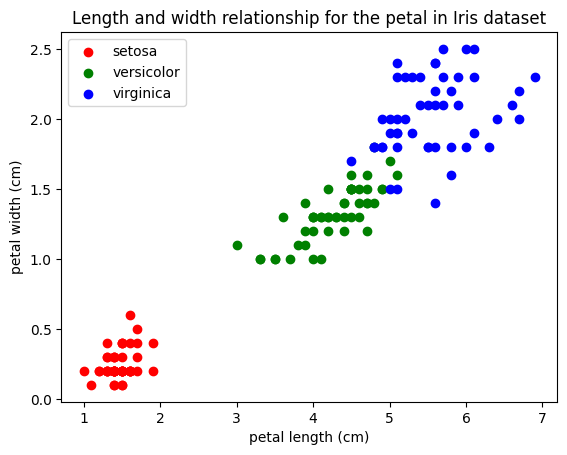

In [18]:
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

for sp in iris_y_df['species_names'].unique():
    plt.scatter(iris_X_df[iris_y_df['species_names'] == sp]['petal length (cm)'], 
                iris_X_df[iris_y_df['species_names'] == sp]['petal width (cm)'], 
                c=colors[sp], 
                label=sp)
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.legend()
plt.title('Length and width relationship for the petal in Iris dataset')
plt.show()

In [19]:
tmp_df = pd.merge(iris_X_df, iris_y_df['species_names'], left_index=True, right_index=True)
sns.pairplot(tmp_df, hue='species_names', height=2)

### Wine Data Plot

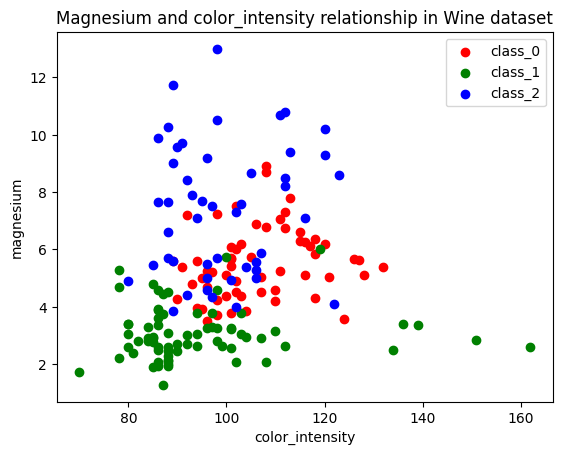

In [20]:
colors = {'class_0': 'red', 'class_1': 'green', 'class_2': 'blue'}

for sp in wine_y_df['species_names'].unique():
    plt.scatter(wine_X_df[wine_y_df['species_names'] == sp]['magnesium'], 
                wine_X_df[wine_y_df['species_names'] == sp]['color_intensity'], 
                c=colors[sp], 
                label=sp)
plt.ylabel('magnesium')
plt.xlabel('color_intensity')
plt.legend()
plt.title('Magnesium and color_intensity relationship in Wine dataset')
plt.show()

In [21]:
tmp_df = pd.merge(wine_X_df, wine_y_df['species_names'], left_index=True, right_index=True)
sns.pairplot(tmp_df, hue='species_names', height=2)

### Glass Data Plot

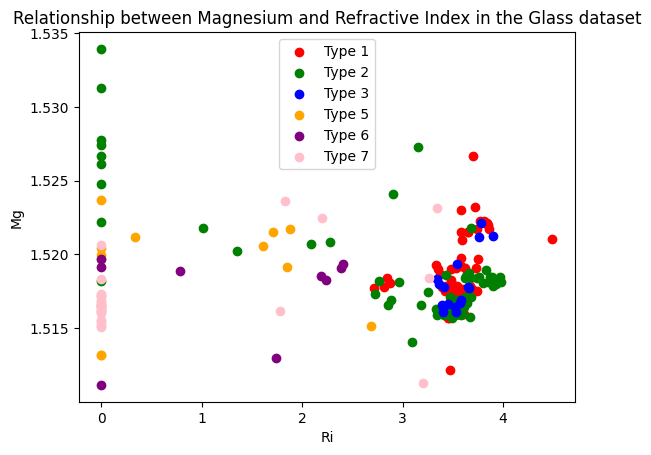

In [22]:
colors = {'1': 'red', '2': 'green', '3': 'blue', '4': 'yellow', '5': 'orange', '6': 'purple', '7': 'pink'}

for sp in glass_y_df['Type_of_glass'].unique():
    plt.scatter(glass_X_df[glass_y_df['Type_of_glass'] == sp]['Mg'], 
                glass_X_df[glass_y_df['Type_of_glass'] == sp]['RI'], 
                c=colors[str(sp)], 
                label='Type ' + str(sp))
plt.ylabel('Mg')
plt.xlabel('Ri')
plt.legend()
plt.title('Relationship between Magnesium and Refractive Index in the Glass dataset')
plt.show()

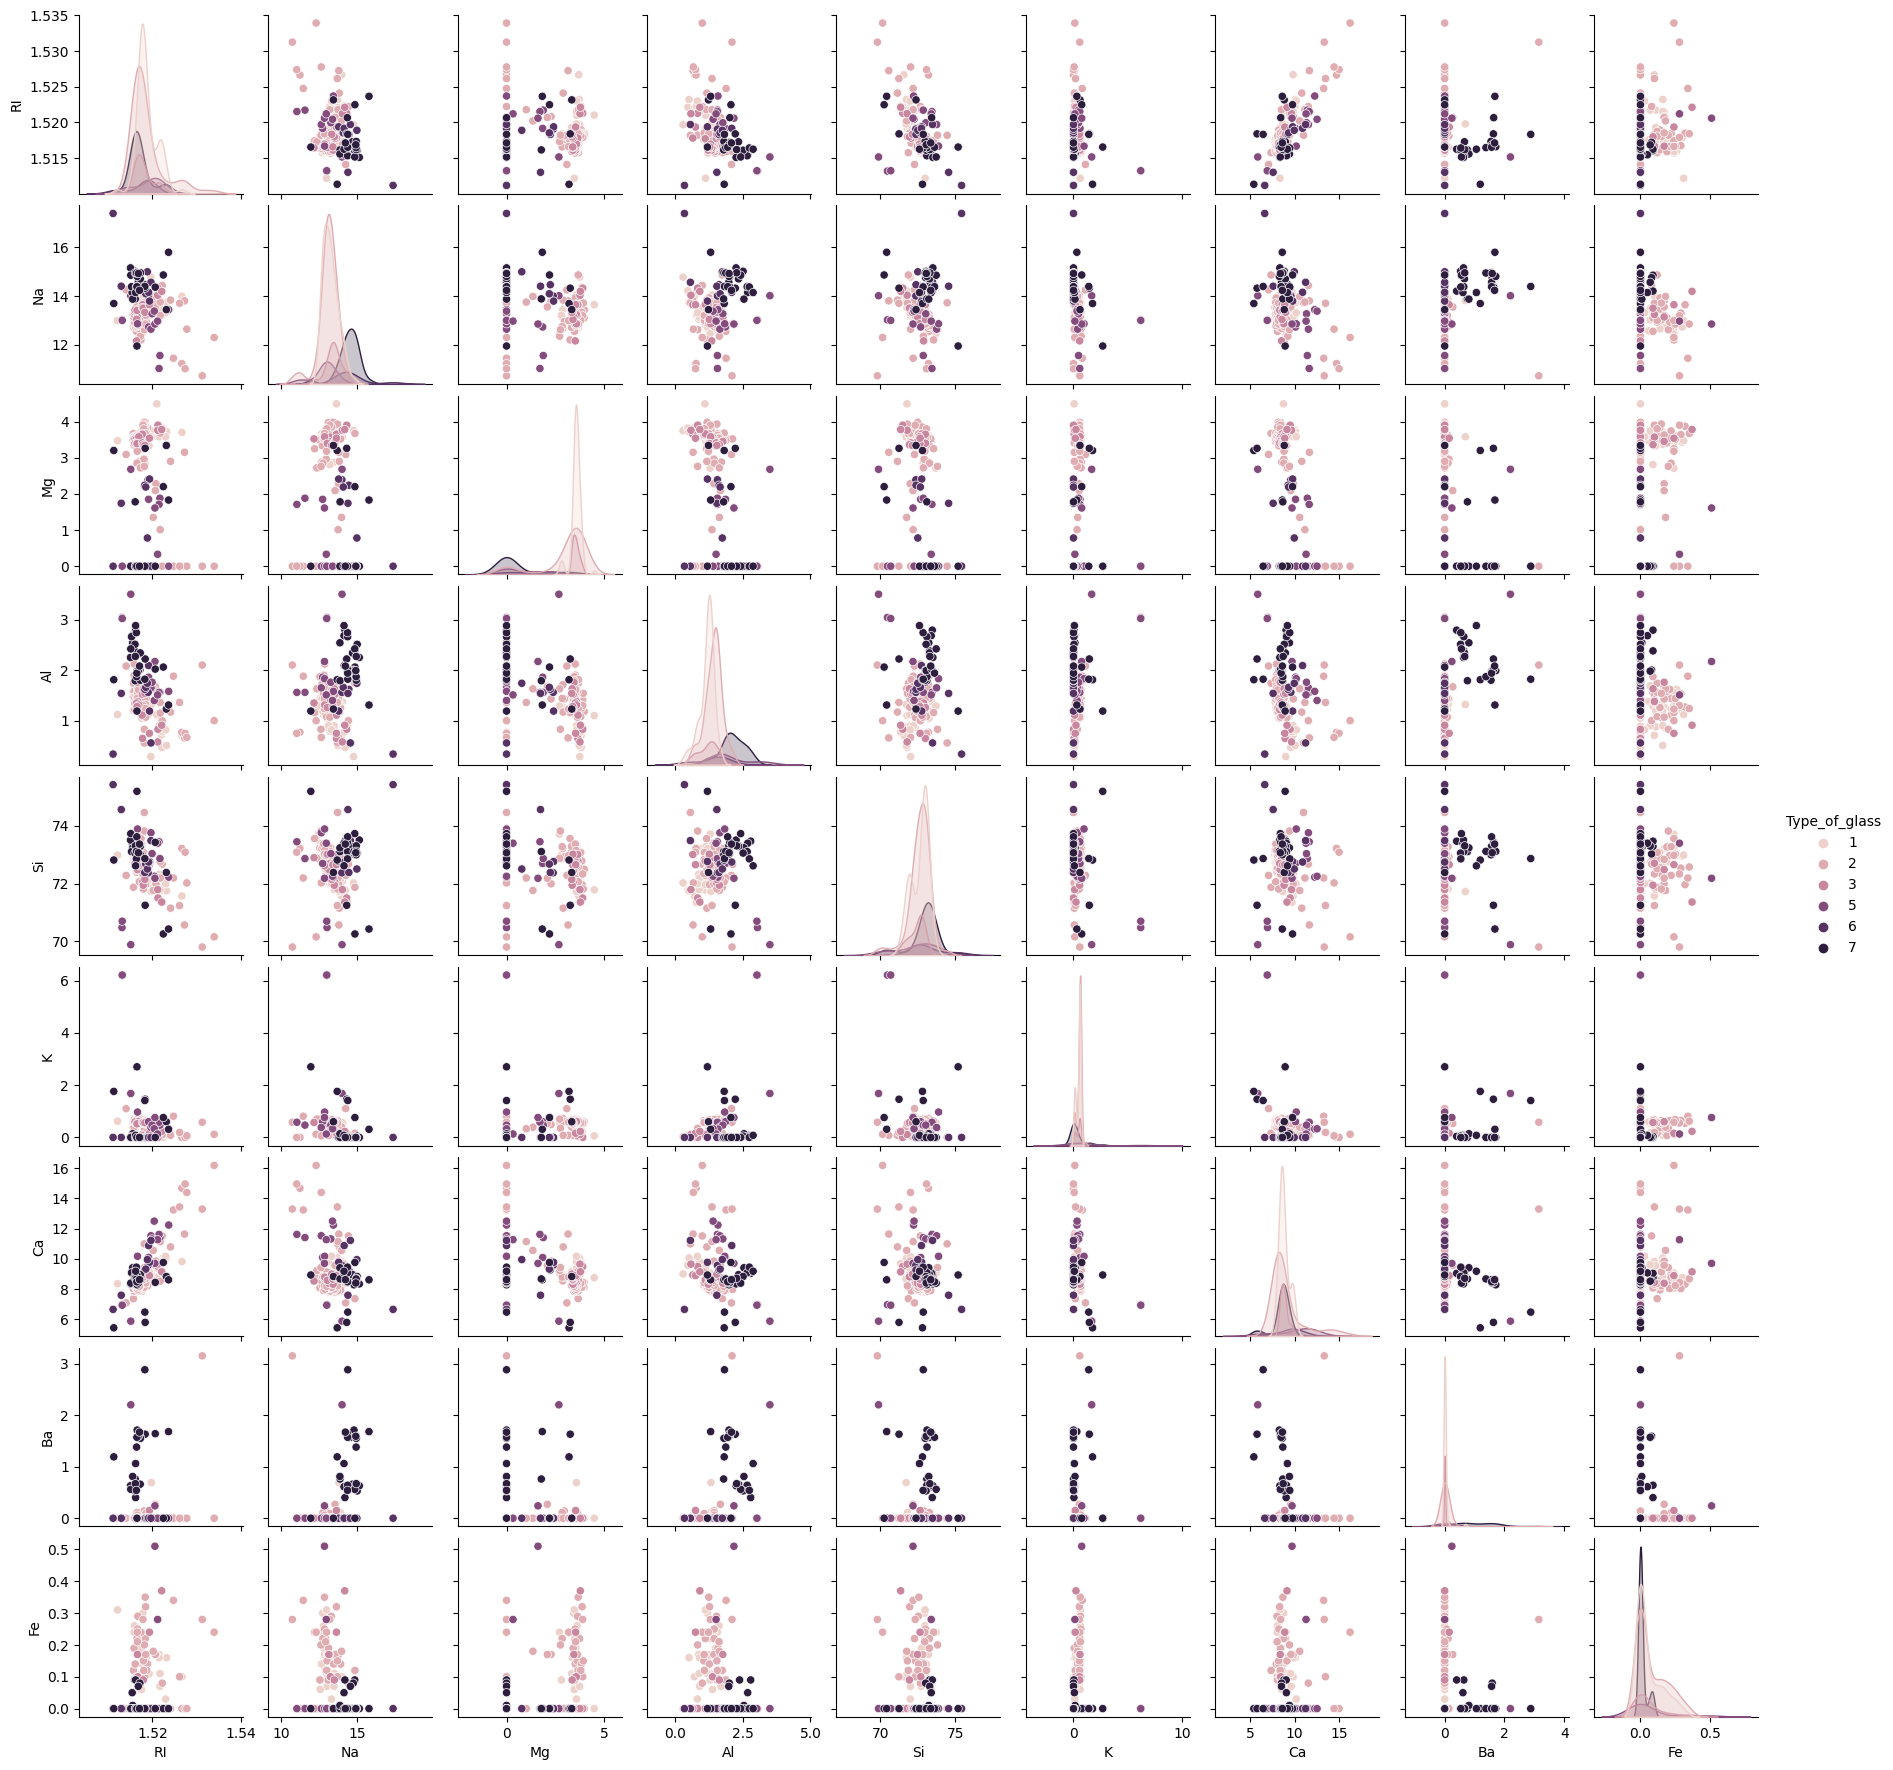

In [23]:
tmp_df = pd.merge(glass_X_df, glass_y_df['Type_of_glass'], left_index=True, right_index=True)
sns.pairplot(tmp_df, hue='Type_of_glass', height=2)

## PCA

### PCA for Iris Dataset

In [24]:
scaler_iris = StandardScaler()
iris_X_df_scaled = scaler_iris.fit_transform(iris_X_df)

pca_iris = PCA(n_components=2)
iris_X_df_pca = pca_iris.fit_transform(iris_X_df_scaled)

colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

for sp in iris_y_df['species_names'].unique():
    plt.scatter(iris_X_df_pca[iris_y_df['species_names'] == sp][:, 0], 
                iris_X_df_pca[iris_y_df['species_names'] == sp][:, 1], 
                c=colors[sp], 
                label=sp)
plt.ylabel('First Principal Component')
plt.xlabel('Second Principal Component')
plt.legend()
plt.title('PCA for the Iris dataset')
plt.show()

In [32]:
pca_iris.explained_variance_ratio_

array([0.72962445, 0.22850762])

### PCA for Wine Dataset

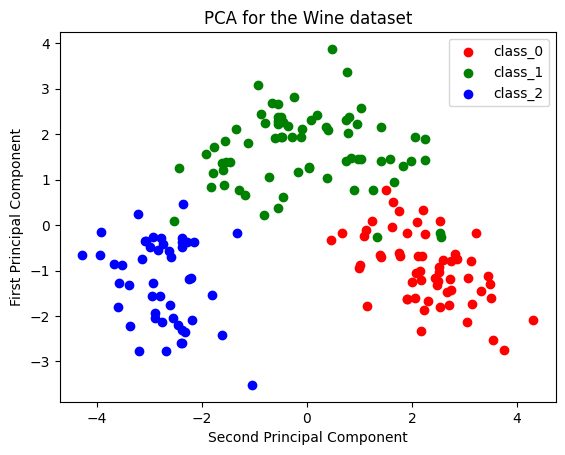

In [25]:
scaler_wine = StandardScaler()
wine_X_df_scaled = scaler_wine.fit_transform(wine_X_df)

pca_wine = PCA(n_components=2)
wine_X_df_pca = pca_wine.fit_transform(wine_X_df_scaled)

colors = {'class_0': 'red', 'class_1': 'green', 'class_2': 'blue'}

for sp in wine_y_df['species_names'].unique():
    plt.scatter(wine_X_df_pca[wine_y_df['species_names'] == sp][:, 0], 
                wine_X_df_pca[wine_y_df['species_names'] == sp][:, 1], 
                c=colors[sp], 
                label=sp)
plt.ylabel('First Principal Component')
plt.xlabel('Second Principal Component')
plt.legend()
plt.title('PCA for the Wine dataset')
plt.show()

In [29]:
pca_wine.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

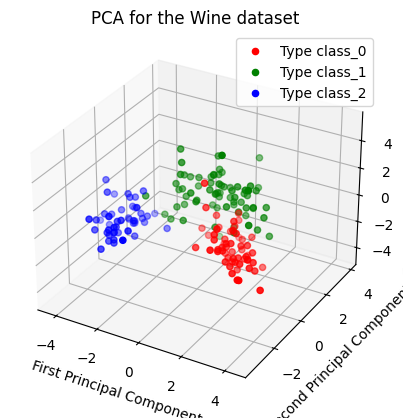

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

scaler_wine = StandardScaler()
wine_X_df_scaled = scaler_wine.fit_transform(wine_X_df)

pca_wine = PCA(n_components=3)  # Set n_components to 3
wine_X_df_pca = pca_wine.fit_transform(wine_X_df_scaled)

colors = {'class_0': 'red', 'class_1': 'green', 'class_2': 'blue'}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for sp in wine_y_df['species_names'].unique():
    ax.scatter(wine_X_df_pca[wine_y_df['species_names'] == sp][:, 0], 
               wine_X_df_pca[wine_y_df['species_names'] == sp][:, 1], 
               wine_X_df_pca[wine_y_df['species_names'] == sp][:, 2], 
               c=colors[str(sp)], 
               label='Type ' + str(sp))

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.legend()
ax.set_title('PCA for the Wine dataset')

plt.show()

In [31]:
pca_wine.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631])

### PCA in Glass Dataset

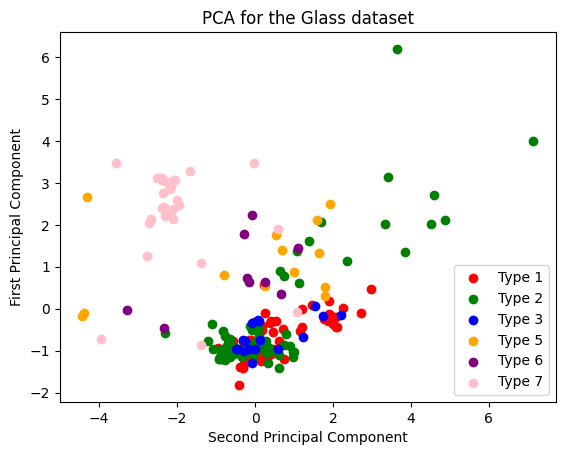

In [26]:
scaler_glass = StandardScaler()
glass_X_df_scaled = scaler_glass.fit_transform(glass_X_df)

pca_glass = PCA(n_components=2)
glass_X_df_pca = pca_glass.fit_transform(glass_X_df_scaled)

colors = {'1': 'red', '2': 'green', '3': 'blue', '4': 'yellow', '5': 'orange', '6': 'purple', '7': 'pink'}

for sp in glass_y_df['Type_of_glass'].unique():
    plt.scatter(glass_X_df_pca[glass_y_df['Type_of_glass'] == sp][:, 0], 
                glass_X_df_pca[glass_y_df['Type_of_glass'] == sp][:, 1], 
                c=colors[str(sp)], 
                label='Type ' + str(sp))
plt.ylabel('First Principal Component')
plt.xlabel('Second Principal Component')
plt.legend()
plt.title('PCA for the Glass dataset')
plt.show()

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

scaler_glass = StandardScaler()
glass_X_df_scaled = scaler_glass.fit_transform(glass_X_df)

pca_glass = PCA(n_components=3)  # Set n_components to 3
glass_X_df_pca = pca_glass.fit_transform(glass_X_df_scaled)

colors = {'1': 'red', '2': 'green', '3': 'blue', '4': 'yellow', '5': 'orange', '6': 'purple', '7': 'pink'}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for sp in glass_y_df['Type_of_glass'].unique():
    ax.scatter(glass_X_df_pca[glass_y_df['Type_of_glass'] == sp][:, 0], 
               glass_X_df_pca[glass_y_df['Type_of_glass'] == sp][:, 1], 
               glass_X_df_pca[glass_y_df['Type_of_glass'] == sp][:, 2], 
               c=colors[str(sp)], 
               label='Type ' + str(sp))

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.legend()
ax.set_title('PCA for the Glass dataset')

plt.show()

In [28]:
pca_glass.explained_variance_ratio_

array([0.27901819, 0.2277858 , 0.15609378])